![](tec.png)


    
## **Análisis de Datos Masivos**
## Visualización de medidores de Internet
## **Nombre del docente**
### José Gabriel Rodriguez Rivas
## **Nombre del alumno**
### Najib Alejandro Loera Rodriguez


## Objetivos

#### **Parte 1: Limpieza y análisis de datos**

#### **Parte 2: Visualización de datos**

### Parte 1: Limpieza y análisis de datos

Se dice a veces que quienes practican el aprendizaje automático dedican el 80 % de su tiempo a la limpieza de datos. Si bien esta afirmación es probablemente una exageración, es verdad que la limpieza de datos es una tarea fundamental y necesaria para garantizar el éxito de un proyecto de aprendizaje automático. Como en muchas otras líneas de trabajo, se aplica la ley «basura que entra, basura que sale». Simplemente, no es posible realizar un análisis significativo de datos en datos sucios.

### Paso 1: Limpieza de datos

In [1]:
# importar 
import pandas as pd
import numpy as np

In [2]:
# Code Cell 2
# Import data from csv file
df_compact = pd.read_csv('rpi_data_compact2.csv')

df_compact.head(3)

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25


In [3]:
df_compact.head(5)

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27


In [4]:
# Nos da true o false en los valores nulos 
NaNs_in_df = df_compact.isnull()
print(type(NaNs_in_df))
NaNs_in_df.tail()

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
675,False,False,False,True,True,True
676,False,False,False,True,True,True
677,False,False,False,True,True,True
678,False,False,False,True,True,True
679,False,False,False,False,False,True


In [5]:


# Code Cell 5
NaNs_per_column = NaNs_in_df.sum()
print(type(NaNs_per_column))
NaNs_per_column.head()



<class 'pandas.core.series.Series'>


Unnamed: 0           0
Ping (ms)            1
Download (Mbit/s)    1
Upload (Mbit/s)      7
Date                 7
dtype: int64

In [6]:
# Calcula la suma de los valores nulos
NaNs_total = NaNs_per_column.sum()
NaNs_total

24

In [7]:
# otra forma de sumar valores nulos es la siguiente
df_compact.isnull().sum().sum()

24

In [8]:
# Code Cell 8
NaNs_pct = np.round(df_compact.isnull().sum().sum()/float(len(df_compact)*len(df_compact.columns))*100, decimals = 4)
print('The DataFrame contains : {} NaNs, equals to {} of the measurements'.format(NaNs_total, NaNs_pct))

The DataFrame contains : 24 NaNs, equals to 0.5882 of the measurements


In [9]:
# Code Cell 9
# Elimina los datos nulos y lo agregasmo a un nuevo data frame
df_compact_clean = df_compact.dropna()

In [10]:
print(len(df_compact))
len(df_compact_clean)

680


672

Compare la longitud de la Estructura de datos antes y después de utilizar dropna. ¿Observa algún valor impar? ¿Por qué?

**Respuesta:**  No , por que se han borrado 8 filas y en cada una de esas filas estaban columnas con informacion y ademas de que tenian Nan teniendo un total de 24 puesto que se eliminaronlas filas que contenian esos datos

### d) Cambie el formato de los valores.

In [11]:
# Code Cell 11
# Ping and Download are not floats
df_compact.dtypes

Unnamed: 0             int64
Ping (ms)            float64
Download (Mbit/s)    float64
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [12]:
# Code Cell 12
str_val = '10.56'
float_val = float(str_val)
print(str_val, type(str_val), float_val, type(float_val))

10.56 <class 'str'> 10.56 <class 'float'>


In [13]:
df_compact_clean['Ping (ms)_float'] = df_compact_clean['Ping (ms)'].apply(lambda val: float(val))
df_compact_clean['Download (Mbit/s)_float'] = df_compact_clean['Download (Mbit/s)'].apply(lambda val: float(val))

C:\Users\Blue\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Blue\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
df_compact_clean.dtypes

Unnamed: 0                   int64
Ping (ms)                  float64
Download (Mbit/s)          float64
Upload (Mbit/s)            float64
Date                        object
Time                        object
Ping (ms)_float            float64
Download (Mbit/s)_float    float64
dtype: object

In [15]:
df_compact_clean.drop(['Ping (ms)','Download (Mbit/s)'], axis = 1 , inplace = True)

C:\Users\Blue\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
df_compact_clean.head()

,Unnamed: 0,Upload (Mbit/s),Date,Time,Ping (ms)_float,Download (Mbit/s)_float
0,0,14.31,2016-11-24,13:36:25,26.992,91.80
1,1,14.12,2016-11-24,13:36:55,24.532,88.19
2,2,14.11,2016-11-24,13:37:25,20.225,59.86
3,3,14.22,2016-11-24,13:37:57,19.332,91.81
4,4,14.08,2016-11-24,13:38:27,22.494,92.05


In [17]:
df_compact_clean.drop(['Unnamed: 0'], axis = 1 , inplace = True)

In [18]:
df_compact_clean.head()

,Upload (Mbit/s),Date,Time,Ping (ms)_float,Download (Mbit/s)_float
0,14.31,2016-11-24,13:36:25,26.992,91.80
1,14.12,2016-11-24,13:36:55,24.532,88.19
2,14.11,2016-11-24,13:37:25,20.225,59.86
3,14.22,2016-11-24,13:37:57,19.332,91.81
4,14.08,2016-11-24,13:38:27,22.494,92.05


In [19]:
columnas = {'Ping (ms)_float': 'Ping(ms)', 'Download (Mbit/s)_float':'Download (Mbit/s)'}
df_compact_clean.rename(columns=columnas, inplace= True)

C:\Users\Blue\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [20]:
# Code Cell 17
df_compact_clean.reindex(columns = ['Date', 'Time', 'Ping (ms)', 'Download (Mbit/s)', 'Upload (Mbit/s)']);

In [21]:
df_compact_clean.head()

,Upload (Mbit/s),Date,Time,Ping(ms),Download (Mbit/s)
0,14.31,2016-11-24,13:36:25,26.992,91.80
1,14.12,2016-11-24,13:36:55,24.532,88.19
2,14.11,2016-11-24,13:37:25,20.225,59.86
3,14.22,2016-11-24,13:37:57,19.332,91.81
4,14.08,2016-11-24,13:38:27,22.494,92.05


In [22]:
# Guardar el nuevo data frame en un csv

df_compact_clean.to_csv('rpi_data_processed.csv', index=False)
df_clean = df_compact_clean

In [23]:
df_clean.head()

,Upload (Mbit/s),Date,Time,Ping(ms),Download (Mbit/s)
0,14.31,2016-11-24,13:36:25,26.992,91.80
1,14.12,2016-11-24,13:36:55,24.532,88.19
2,14.11,2016-11-24,13:37:25,20.225,59.86
3,14.22,2016-11-24,13:37:57,19.332,91.81
4,14.08,2016-11-24,13:38:27,22.494,92.05



#### Paso 2: Estadísticas básicas

Los nuevos datos requieren no solo limpieza, sino también tiempo para familiarizarse con ellos. Cuando inicia un proyecto de análisis de datos, vale la pena invertir en explorar y calcular algunas propiedades estadísticas básicas de los datos. Esto implica calcular promedios, desviaciones estándar y correlaciones.


**Calcule el promedio y la desviación estándar con Pandas.**

In [26]:
# Code Cell 19
#Compute mean and std for all the columns of df_compact
means = df_clean.mean()
stands = df_clean.std()

#Place mean and std for each column in a tuple
stats_ping = (means['Ping(ms)'], stands['Ping(ms)'])
stats_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
stats_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])

#Print the mean value ± the standard deviation, including measuring units
print('Average ping time: {} ± {} ms'.format(*stats_ping))
print('Average download speed: {} ± {} Mbit/s'.format(*stats_download))
print('Average upload speed: {} ± {} Mbit/s'.format(*stats_upload))

Average ping time: 21.113875000000007 ± 5.164907779028767 ms
Average download speed: 90.45629464285713 ± 3.4633514246179895 Mbit/s
Average upload speed: 13.69681547619048 ± 1.0810800645602712 Mbit/s


In [27]:


# Code Cell 20
means = df_clean.mean()
print(means)
means['Ping(ms)']



Upload (Mbit/s)      13.696815
Ping(ms)             21.113875
Download (Mbit/s)    90.456295
dtype: float64


21.113875000000007

In [28]:


# Code Cell 21
df_clean['Ping(ms)'].values.sum()/len(df_clean)
print(df_clean['Ping(ms)'].mean())
print(df_clean.mean()['Ping(ms)'])



21.113875000000007
21.113875000000007


In [29]:
# Code Cell 22
df_clean['Date'][0]

'2016-11-24'

**Calcule la desviación mínima y máxima con Pandas.**

In [30]:
# Code Cell 23
#Compute max and min for all the columns of df_compact
mins = df_clean.min()
maxs = df_clean.max()

#Place mean and std for each column in a tuple
mima_ping = (mins['Ping(ms)'], maxs['Ping(ms)'])
mima_download = (mins['Download (Mbit/s)'], maxs['Download (Mbit/s)'])
mima_upload = (mins['Upload (Mbit/s)'], maxs['Upload (Mbit/s)'])

#Print the mean and max values, including measuring units
print('Min ping time: {} ms. Max ping time: {} ms'.format(*mima_ping))
print('Min download speed: {} Mbit/s. Max download speed: {} Mbit/s'.format(*mima_download))
print('Min upload speed: {} Mbit/s. Max upload speed: {} Mbit/s'.format(*mima_upload))

Min ping time: 16.167 ms. Max ping time: 76.528 ms
Min download speed: 58.48 Mbit/s. Max download speed: 92.87 Mbit/s
Min upload speed: 6.21 Mbit/s. Max upload speed: 14.55 Mbit/s


In [31]:


# Code Cell 24
df_clean.describe()



,Upload (Mbit/s),Ping(ms),Download (Mbit/s)
count,672.000000,672.000000,672.000000
mean,13.696815,21.113875,90.456295
std,1.081080,5.164908,3.463351
min,6.210000,16.167000,58.480000
25%,13.640000,19.113500,90.220000
50%,13.980000,20.320000,91.565000
75%,14.180000,21.837750,92.070000
max,14.550000,76.528000,92.870000


#### *Utilice argmin, argmax e iloc*

Supongamos que quisiera tener un guión de computadora que envíe informes de estado por correo electrónico a su proveedor de Internet. Los informes deberían incluir la fecha y la hora correspondientes a la velocidad mínima de Internet. La información temporal le permite al proveedor de Internet identificar con precisión la causa detrás de la conexión lenta que observó.

Con las funciones argmin y argmax de pandas, podrá encontrar las fechas y las horas correspondientes al tiempo más breve y extenso de ping, la velocidad de descarga más baja y más alta y la velocidad de carga más baja y más alta.


In [32]:
# Code Cell 25
# Find the min and max ping time
argmin_ping = df_clean['Ping(ms)'].argmin()
argmax_ping = df_clean['Ping(ms)'].argmax()

# Find the min and max download speed
argmin_download = df_clean['Download (Mbit/s)'].argmin()
argmax_download = df_clean['Download (Mbit/s)'].argmax()

# Find the min and max upload speed
argmin_upload = df_clean['Upload (Mbit/s)'].argmin()
argmax_upload = df_clean['Upload (Mbit/s)'].argmax()

C:\Users\Blue\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Blue\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  after removing the cwd from sys.path.
C:\Users\Blue\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
inst

In [33]:
# Code Cell 26
# Create a small DataFrame and access its rows using iloc

# A pandas DataFrame can be initialized passing a dict as a parameter to the constructor pd.DataFrame(). 
# The key will represent the column, the values the rows.
df = pd.DataFrame({'field_1': [0,1], 'field_2': [0,2]})
df.head()

,field_1,field_2
0,0,0
1,1,2


In [34]:
# Code Cell 27
# To access the field_1 of the first row using iloc()
df.iloc[1]['field_1']



1

In [37]:
# Code Cell 28
# print the corresponding Date and Time
print('La velocidad minima de Ping se alcanzo el {} a las {}'.format(df_clean.loc[argmin_ping].Date, 
                                                        df_clean.loc[argmin_ping].Time))

print('La velocidad minima de descarga se alcanzo el {} las {}'.format(df_clean.loc[argmin_download].Date, 
                                                        df_clean.loc[argmin_download].Time))

print('La velocidad minima de carga se alcanzo el {} las {}'.format(df_clean.loc[argmin_upload].Date, 
                                                        df_clean.loc[argmin_upload].Time))


print('La velocidad maxima de Ping se alcanzo el {} a las {}'.format(df_clean.loc[argmax_ping].Date, 
                                                        df_clean.loc[argmax_ping].Time))

print('La velocidad maxima de descarga se alcanzo el {} las {}'.format(df_clean.loc[argmax_download].Date, 
                                                        df_clean.loc[argmax_download].Time))

print('La velocidad maxima de carga se alcanzo el {} las {}'.format(df_clean.loc[argmax_upload].Date, 
                                                        df_clean.loc[argmax_upload].Time))


La velocidad minima de Ping se alcanzo el 2016-11-24 a las 15:26:20
La velocidad minima de descarga se alcanzo el 2016-11-24 las 14:57:55
La velocidad minima de carga se alcanzo el 2016-11-24 las 17:31:47
La velocidad maxima de Ping se alcanzo el 2016-11-24 a las 17:30:06
La velocidad maxima de descarga se alcanzo el 2016-11-24 las 17:02:49
La velocidad maxima de carga se alcanzo el 2016-11-24 las 18:02:15


### Cree una correlación

In [38]:
df_corr = df_clean.corr()
df_corr

,Upload (Mbit/s),Ping(ms),Download (Mbit/s)
Upload (Mbit/s),1.000000,-0.463348,0.084833
Ping(ms),-0.463348,1.000000,-0.045271
Download (Mbit/s),0.084833,-0.045271,1.000000


In [39]:
# Code Cell 30
corr = df_corr.values
print('Correlation coefficient between ping and download: {}'.format(corr[0, 1]))
print('Correlation coefficient between ping and upload: {}'.format(corr[0, 2]))
print('Correlation coefficient between upload and download: {}'.format(corr[2, 1]))

Correlation coefficient between ping and download: -0.46334785028069125
Correlation coefficient between ping and upload: 0.08483302146561673
Correlation coefficient between upload and download: -0.04527104992092839


### *Parte 2: Visualización de datos*

In [40]:
# importar librerias
import matplotlib.pyplot as plt

# The following allows your Jupyter notebook to create plots inside a cell
%matplotlib inline 

Cree un gráfico con las estadísticas de la velocidad de Internet

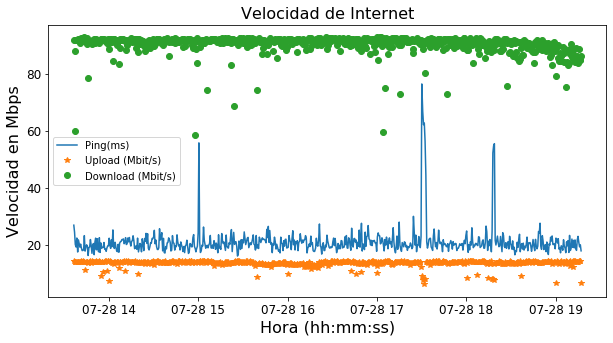

In [48]:
# Code Cell 32
# Initialise figure
fig, ax = plt.subplots(figsize=(10, 5))

# Create x-axis
t = pd.to_datetime(df_clean['Time'])

# Plot three curves of different colors
ax.plot(t, df_clean['Ping(ms)'], label='Ping(ms)')
ax.plot(t, df_clean['Upload (Mbit/s)'],'*', label='Upload (Mbit/s)')
ax.plot(t, df_clean['Download (Mbit/s)'],'o', label='Download (Mbit/s)')

# Insert legend
ax.legend()
#Add axis labels and title
ax.set_xlabel('Hora (hh:mm:ss)', size=16)
ax.set_ylabel('Velocidad en Mbps', size=16)
ax.set_title('Velocidad de Internet', size=16)
ax.tick_params(labelsize=12)

plt.show()

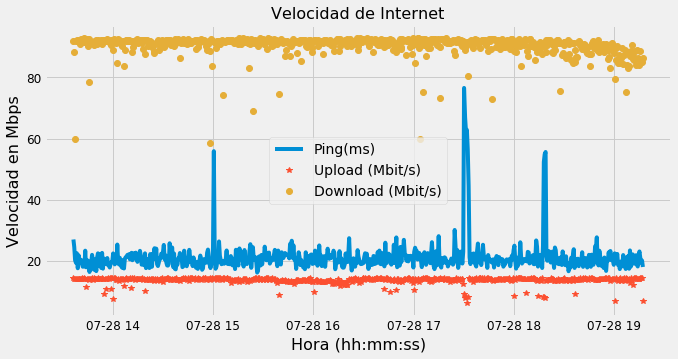

In [50]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(10, 5))

    # Create x-axis
    t = pd.to_datetime(df_clean['Time'])

    # Plot three curves of different colors
    ax.plot(t, df_clean['Ping(ms)'], label='Ping(ms)')
    ax.plot(t, df_clean['Upload (Mbit/s)'],'*', label='Upload (Mbit/s)')
    ax.plot(t, df_clean['Download (Mbit/s)'],'o', label='Download (Mbit/s)')

    # Insert legend
    ax.legend()
    #Add axis labels and title
    ax.set_xlabel('Hora (hh:mm:ss)', size=16)
    ax.set_ylabel('Velocidad en Mbps', size=16)
    ax.set_title('Velocidad de Internet', size=16)
    ax.tick_params(labelsize=12)

    plt.show()

### Cree un histograma

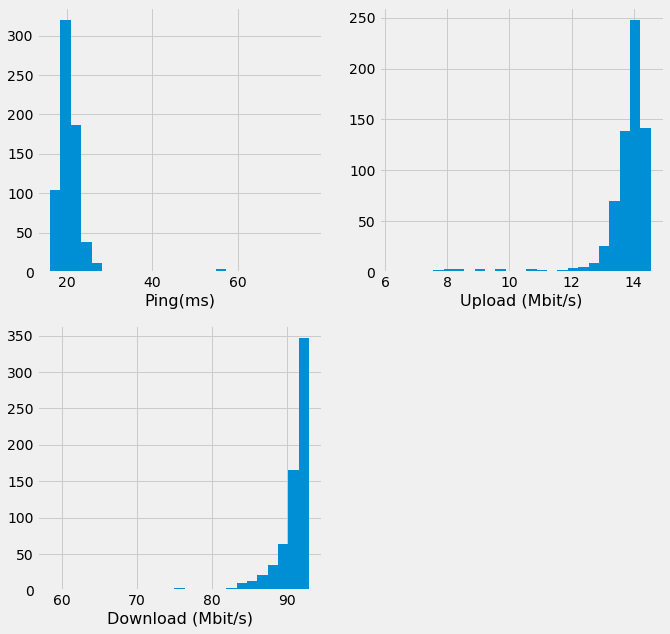

In [51]:
# Code Cell 37
with plt.style.context('fivethirtyeight'):
    
    # Initialize figure
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0][0].hist(df_clean['Ping(ms)'], 25)
    ax[0][0].set_xlabel('Ping(ms)', fontsize=16)
    ax[0][0].tick_params(labelsize=14)
    ax[0][1].hist(df_clean['Upload (Mbit/s)'], 25)
    ax[0][1].set_xlabel('Upload (Mbit/s)', fontsize=16)
    ax[0][1].tick_params(labelsize=14)
    ax[1][0].hist(df_clean['Download (Mbit/s)'], 25)
    ax[1][0].set_xlabel('Download (Mbit/s)', fontsize=16)
    ax[1][0].tick_params(labelsize=14)
    ax[1][1].set_visible(False)